# ✅ 3. LinearDiscriminantAnalysis

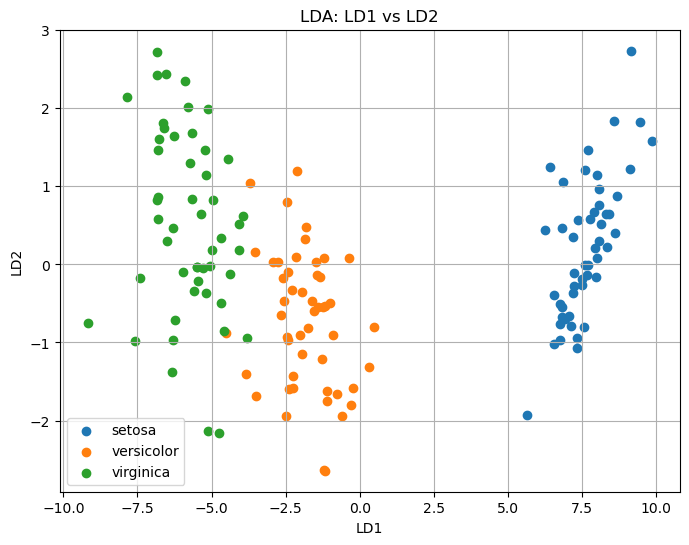


LDA Coefficient Table:
                        LD1       LD2
sepal length (cm)  0.829378  0.024102
sepal width (cm)   1.534473  2.164521
petal length (cm) -2.201212 -0.931921
petal width (cm)  -2.810460  2.839188


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Fit LDA (no train-test split)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# --- 1. Visualization (LD1 vs LD2) ---
plt.figure(figsize=(8, 6))
for i, name in enumerate(target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=name)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA: LD1 vs LD2')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. LDA Coefficient Table (for LD1 and LD2) ---
coef_table = pd.DataFrame(lda.scalings_[:, :2], index=feature_names, columns=['LD1', 'LD2'])
print('\nLDA Coefficient Table:')
print(coef_table)


# ✅ 4. Implement the concept of Principal Component Analysis (PCA)



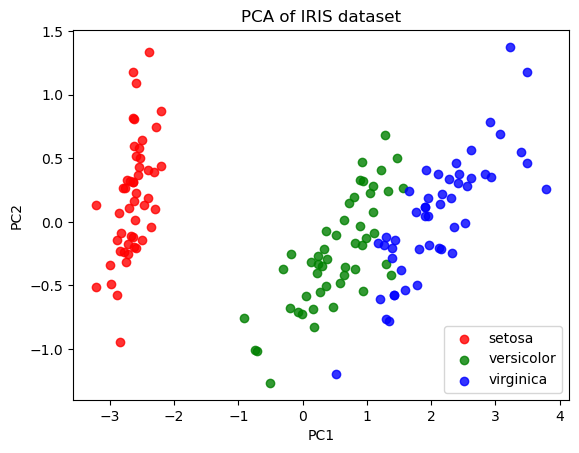

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Plot
colors = ['red', 'green', 'blue']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title('PCA of IRIS dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# 6. Implement the concept of K-Nearest Neighbors (KNN)

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9590643274853801


# ✅ 10. Implement the concept of Data Condensation

In [155]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply KMeans for data condensation
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
condensed_data = kmeans.cluster_centers_

print("Original data shape:", X.shape)
print("Condensed data shape:", condensed_data.shape)


Original data shape: (150, 4)
Condensed data shape: (3, 4)


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# ✅ 7. Implement the concept of Feature Selection

In [90]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

print("Original shape:", X.shape)
print("Reduced shape:", X_new.shape)



Original shape: (150, 4)
Reduced shape: (150, 2)


# ✅ 5. Implement the concept of K-Means Clustering and Elbow Method


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

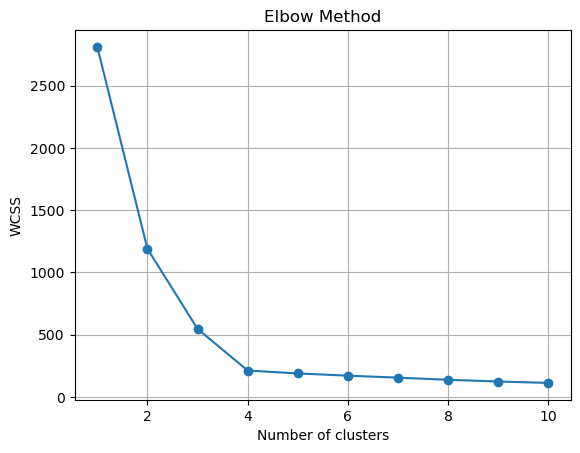

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot with grid
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)  # Add grid
plt.show()


# ✅ 2. Implement the concept of Eigenvalues and Eigenvectors

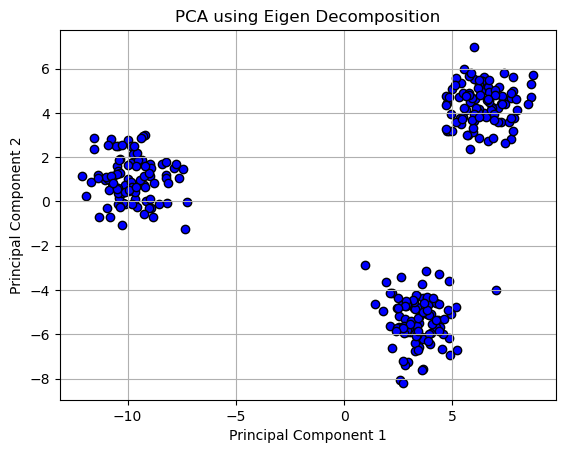

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Step 2: Standardize the data (zero mean)
X_meaned = X - np.mean(X, axis=0)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 5: Sort eigenvectors by decreasing eigenvalues
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Step 6: Select top k eigenvectors (e.g., k=2)
k = 2
eigenvectors_k = eigenvectors[:, :k]

# Step 7: Transform the data
X_reduced = np.dot(X_meaned, eigenvectors_k)

# Step 8: Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', edgecolors='k')
plt.title('PCA using Eigen Decomposition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# ✅ 1. Implement the concept of Decision Surface

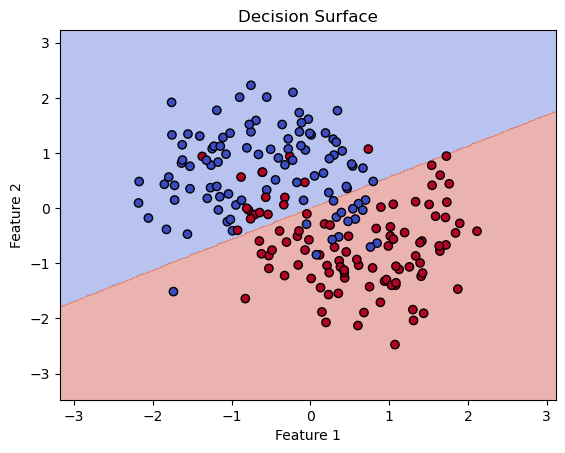

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#  Dataset
X, y = make_moons(n_samples=200, noise=0.3, random_state=0)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
model = LogisticRegression()
model.fit(X_scaled, y)

# Plotting decision surface
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Decision Surface")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 9. Implement the concept of Classifier Comparison

Dataset Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Labels: ['malignant' 'benign']
Shape of X: (569, 30)
Shape of y: (569,)


Training Logistic Regression...
Logistic Regression Accuracy: 0.9766

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97  

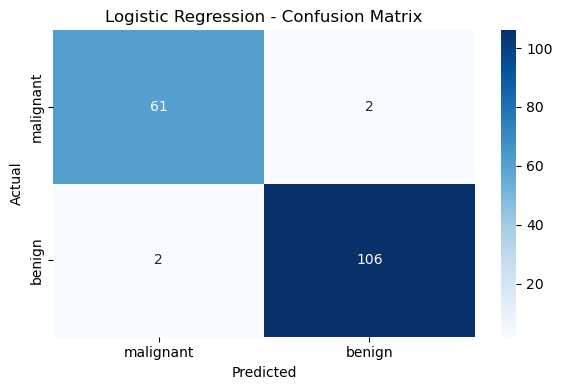


Training Decision Tree...
Decision Tree Accuracy: 0.9532

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.93        63
      benign       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



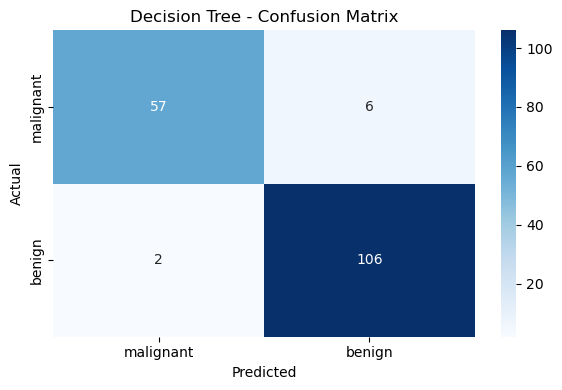


Training SVM...
SVM Accuracy: 0.9357

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.83      0.90        63
      benign       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



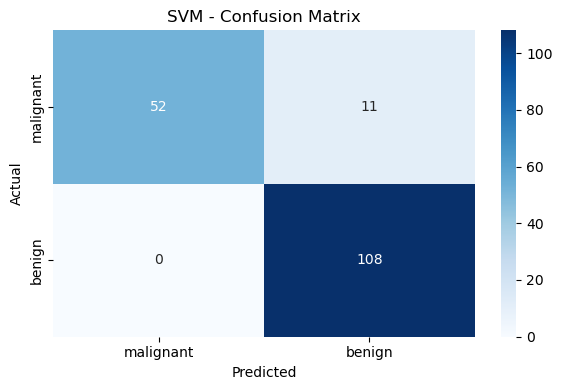


Summary of Accuracy Scores:
Logistic Regression: 0.9766
Decision Tree: 0.9532
SVM: 0.9357


In [159]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Print dataset information
print("Dataset Features:", feature_names)
print("Target Labels:", target_names)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}\n")

# Split dataset into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=5),
    'SVM': SVC(kernel='rbf', C=1.0)
}

# Store accuracy scores
accuracy_results = {}

# Train, predict and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Summary of accuracy scores
print("\nSummary of Accuracy Scores:")
for model, score in accuracy_results.items():
    print(f"{model}: {score:.4f}")
